In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
%matplotlib inline

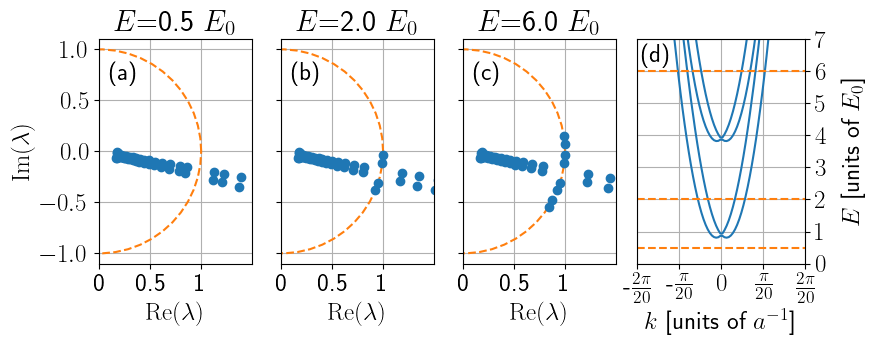

In [7]:
plt.rcParams.update({'font.size': 18})
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "sans-serif",
#    "font.sans-serif": ['Computer Modern Serif']})

plt.rc('text',usetex=True)
font = {'family':'serif','size':18}  # desired use

fig,axs=plt.subplots(1,4,figsize=(9,4))

EnBand=pd.read_csv("..//Data//EnergyBands_Rashba.csv",header=None)
eigCirc=pd.read_csv("..//Data//Data_for_fig2.csv")
grouped = eigCirc.groupby('E')
targets = zip(grouped.groups.keys(), axs.flatten())
theta=np.linspace(0,2*np.pi)
xc=np.cos(theta)
yc=np.sin(theta)
figlabels=['(a)','(b)','(c)']
for i, (key, ax) in enumerate(targets):
    ax.plot(xc,yc,'--',color='C1')
    ax.plot(grouped.get_group(key)['x'],
            grouped.get_group(key)['y'],
            marker='o',
            linewidth=0,
            color='C0')

    ax.set_xlim(0,1.5)
    ax.set_xlabel("$\mathrm{Re}(\lambda)$")
    ax.set_xticks([0,0.5,1])
    ax.set_xticklabels([0,0.5,1])
    ax.set_ylim(-1.1,1.1)

    if i==0: ax.set_ylabel("$\mathrm{Im}(\lambda)$")
    ax.set_aspect('equal')
    ax.set_title('$E$=%.1f $E_0$'%key)
    ax.grid()
    ax.text(0.1,0.7,figlabels[i])
    ax.set_yticks([-0.5,-1,0,0.5,1])
    if i!=0:
        for label in ax.yaxis.get_ticklabels():
            label.set_visible(False)
    
x=EnBand[0].values
for i in range(1,len(EnBand.columns)):
    y=EnBand[i].values
    axs[3].plot(x,y,color='C0')
axs[3].set_ylim(0,7)
axs[3].set_xlim(-0.1*np.pi,0.1*np.pi)


axs[3].yaxis.tick_right()

axs[3].set_xticks(np.array([-0.10*np.pi,
                            -0.05*np.pi,
                            0,
                            0.05*np.pi,
                            0.10*np.pi]))
axs[3].set_xticklabels(np.array([
                        "-$\\frac{2\\pi}{20}$",
                        "-$\\frac{\\pi}{20}$",
                        "$0$",
                        "$\\frac{\\pi}{20}$",
                        "$\\frac{2\\pi}{20}$"]))

axs[3].set_yticks(range(0,8))

axs[3].axhline(0.5,color='C1',linestyle='dashed')
axs[3].axhline(2,color='C1',linestyle='dashed')
axs[3].axhline(6,color='C1',linestyle='dashed')


axs[3].set_xlabel("$k$ [units of $a^{-1}$]")
axs[3].set_ylabel("$E$ [units of $E_0$]",labelpad=10)
axs[3].yaxis.set_label_position("right")
axs[3].grid()
axs[3].text(-0.3,6.3,'(d)')
fig.subplots_adjust(bottom=0.26, top=0.54)



plt.tight_layout(pad=1.5 )#pad=-0.1)
plt.savefig("..//Figures//EigenvalueCircle.eps", bbox_inches='tight',dpi=600)
plt.savefig("..//Figures//EigenvalueCircle.png", bbox_inches='tight',dpi=600)